# Lending Club Case Study - Exploratory Data Analysis

### Structure of notebook

    Problem Statement
    Solution - EDA
        1. Import libraries & Source data
        2. Data Understanding
        3. Data Cleaning
        4. Exploratory Data Analysis
            4.1 Loan distribution & defaulters – “A birds eye view”
            4.2 Univariate Analysis - Loan Characteristics/Applicant Variables
                4.2.1 Loan characteristics analysis
                4.2.2 Applicant variable analysis
            4.3 Bi-variate Analysis and Segmented Analysis to identify factors
                4.3.1 Loan characteristics analysis
                4.3.2 Applicant variable analysis
                4.3.3 Correlation matrix
    Recommendations
    End of file          



# Problem Statement


Assignment Brief:
You work for a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

# Solution - EDA

Data: We have been provided with the Private Data of Lending Club. The complete loan data for all loans issued through the time period 2007 to 2011. We also have a data dictionary which describes the meaning of these variables.

## 1. Import libraries & Source data

Let's start with importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 100)

In [2]:
loan = pd.read_csv("loan.csv",low_memory=False)

## 2. Data Understanding

In [3]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


In [6]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.



## 3. Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [8]:
# checking number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

We can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [10]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [11]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [12]:
# checking number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
# Two column still showing 33% and 65% missing value
# checking the sample data to make a decision
print(loan['desc'].head(5))
print(loan['mths_since_last_delinq'].head(5))

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object
0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64


In [14]:
# desc (33% missing) - This is some text and can be ignored. We have the purpose of the loan in another column
# mths_since_last_delinq(95%) - This will not be avaible for new loan application so this column can be dropped

loan = loan.drop(['desc','mths_since_last_delinq'],axis = 1)
print("Final shape of df loan is: ", loan.shape)

Final shape of df loan is:  (39717, 53)


In [15]:
# checking number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

The columns emp_title, emp_length and pub_rec_bankruptcies have 6.19%,2.71% and 2% missing values.dropping the null rows to make the data cleaner.

In [16]:
#loan=loan[~loan['emp_title'].isnull()]
loan=loan[~loan['emp_length'].isnull()]
#loan=loan[~loan['pub_rec_bankruptcies'].isnull()]

In [17]:
# checking number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     3.726515
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.025879
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Let's check whether some rows have a large number of missing values.

In [18]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 38642, dtype: int64

In [19]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [20]:
loan.shape

(38642, 53)

The data looks clean now, Let's also check whether all columns are in the correct format.

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [22]:
# checking the values
loan['int_rate'].value_counts()

10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
         ... 
16.15%      1
17.46%      1
24.59%      1
24.40%      1
17.54%      1
Name: int_rate, Length: 371, dtype: int64

In [23]:
# The column int_rate is character type, let's convert it to float
loan['int_rate']=loan['int_rate'].apply(lambda x: x.replace("%","")).astype("float")

In [24]:
# checking the data types
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [25]:
# checking the values
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [26]:
# extracting the numeric part from the variable employment length
# using regular expression to extract numeric values from the string and converting it to integer type.
import re

loan['emp_length']=loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0]).astype("int32")

In [27]:
# looking at types of the columns again
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int32
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

## 4. Exploratory Data Analysis

Let's start with data analysis. we have some varaibles which are not useful in analysis. There are certain attributes which is relevant only for a processed loan. As we are trying to predict attributes that
helps to decide whether a loan will be defaulted or not, we can drop this attributes.


""" "member_id,id," - doesn't add any information
"url" - not useful, can be dropped
"pymnt_plan", "application_type", "initial_list_status" - only one value for all rows so no analysis possible
"zip_code" - no use, we can use address_state for analysis
"title" - doesn't seems to add any information """

In [28]:
# Loan attributes applicable only for processed loan

loan_attributes = ["delinq_2yrs", "earliest_cr_line","inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                    "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt","total_pymnt_inv","total_rec_prncp",
                   "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d", "application_type", "member_id","id","url" ,"funded_amnt","pymnt_plan","zip_code","title","initial_list_status",
"application_type"]
print(loan_attributes)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'member_id', 'id', 'url', 'funded_amnt', 'pymnt_plan', 'zip_code', 'title', 'initial_list_status', 'application_type']


In [29]:
# let's now remove the unwanted columns for analysis
df = loan.drop(loan_attributes, axis=1)

In [30]:
df=df.reset_index()

Typically, variables such as acc_now_delinquent, chargeoff within 12 months etc. (which are related to the applicant's past loans).

Next, let's have a look at the loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [31]:
df.shape

(38642, 25)

In [32]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1. 

In [33]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1).astype("int32")

# checking the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

### 4.1 Loan distribution & defaulters – “A birds eye view”

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,37544.0,20345.152408,11434.230775,0.00,10553.75,20592.50,30263.2500,39716.00
loan_amnt,37544.0,11119.329986,7354.098954,500.00,5500.00,10000.00,15000.0000,35000.00
funded_amnt_inv,37544.0,10280.495739,7034.124211,0.00,5000.00,8850.00,14075.0000,35000.00
int_rate,37544.0,11.963319,3.683012,5.42,8.94,11.83,14.4200,24.40
installment,37544.0,324.650164,208.901055,15.69,167.37,280.00,428.9425,1305.19
emp_length,37544.0,5.061048,3.401750,1.00,2.00,4.00,9.0000,10.00
annual_inc,37544.0,69407.080230,64676.984485,4000.00,41000.00,60000.00,83000.0000,6000000.00
loan_status,37544.0,0.143805,0.350896,0.00,0.00,0.00,0.0000,1.00
dti,37544.0,13.284186,6.660551,0.00,8.16,13.38,18.5500,29.99
collections_12_mths_ex_med,37488.0,0.000000,0.000000,0.00,0.00,0.00,0.0000,0.00


The overall default rate based on loan status as 'Charged Off' is about ~14.4% based on above table

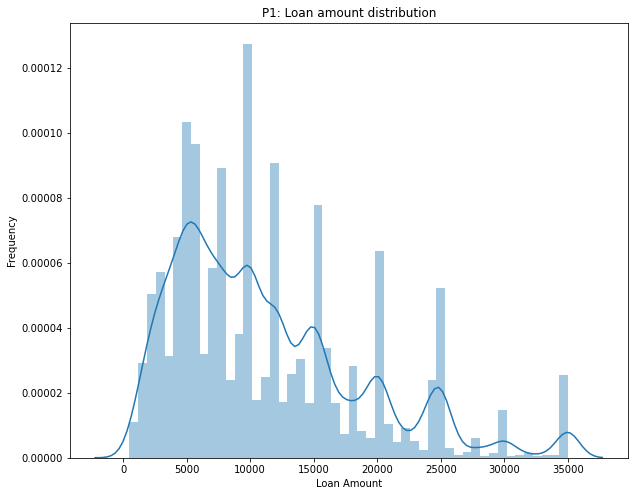

In [35]:
#loan amount distribution
plt.figure(figsize=(10,8))
sns.distplot(loan.loan_amnt)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('P1: Loan amount distribution')
plt.show()

Now, Let's visualise the average default rates across categorical variables.


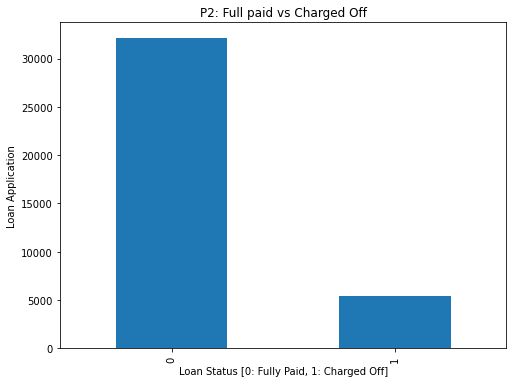

In [36]:
# Ploting the percentage of Full paid vs Charged Off
plt.figure(figsize=(8,6))
df.groupby('loan_status').index.count().plot.bar()
plt.title('P2: Full paid vs Charged Off')
plt.xlabel("Loan Status [0: Fully Paid, 1: Charged Off]")
plt.ylabel("Loan Application")
plt.show()

### 4.2 Univariate Analysis - Loan Characteristics/Applicant Variables

- To check the default rate across various features

    -Loan Characteristics
        -Grade
        -Subgrade
        -Term
        -Verification status
        -Purpose
        -Year/Moth
        -Amount
        -Interest Rate
        -Installment
    -Applicant Variables
        -Home ownership
        -DTI
        -Annual Income
        -Work Experience
- For continous varibles binning is done for univariate analysis 
- Considered only data set for 'Fully paid' and 'Chanrged Off'. Loan status with 'Current' is excluded from analysis
- Customer behaviour vartiables like delinq 2 yrs are excluded from analysis due to the fact that at the time of loan application these variables are not available normally

In [37]:
# defining a function to plot loan_status across categorical variables
def plot_cat(cat_var, sOrder, xLabel, sTitle, sLegend, sRot):
    plt.figure(figsize=(12,10))
    plt.title(sTitle)
    sns.barplot(x=cat_var, y='loan_status', data=df,order=sOrder)
    plt.ylabel('Loan Default Rate')
    plt.xlabel(xLabel)
    plt.legend(sLegend)
    plt.xticks(rotation=sRot)
    plt.show()
    print(results)

#### 4.2.1 Loan characteristics analysis

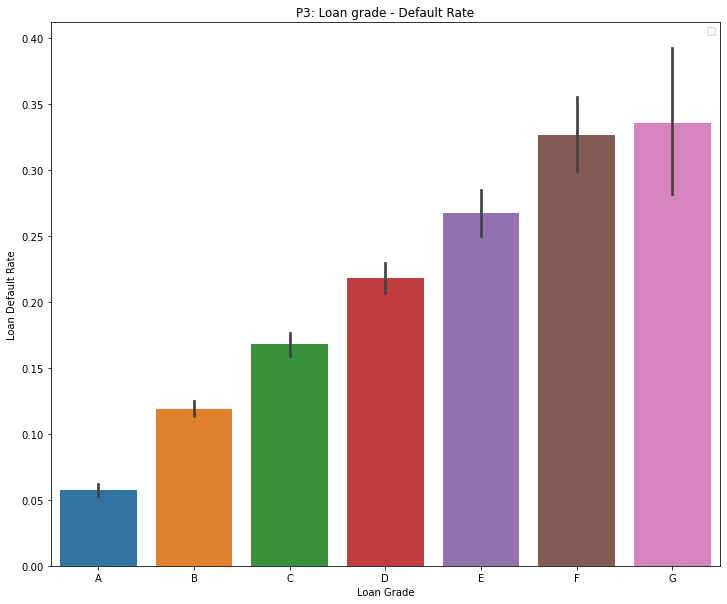

  grade  loan_status
0     A     0.057764
1     B     0.119289
2     C     0.167949
3     D     0.217915
4     E     0.267176
5     F     0.326382
6     G     0.335570


In [38]:
#lets plot loan grade for 
results = df.groupby('grade').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('grade',results.grade,'Loan Grade','P3: Loan grade - Default Rate',{},0)


**Observation:**
- Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

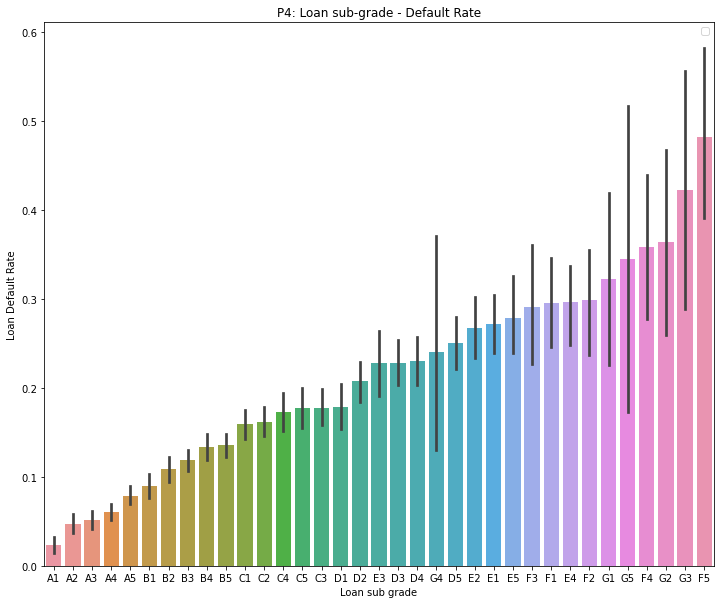

   sub_grade  loan_status
0         A1     0.022814
1         A2     0.047189
2         A3     0.051694
3         A4     0.060172
4         A5     0.078967
5         B1     0.089431
6         B2     0.108539
7         B3     0.118718
8         B4     0.133166
9         B5     0.135209
10        C1     0.158888
11        C2     0.161664
13        C4     0.172619
14        C5     0.177362
12        C3     0.177641
15        D1     0.177948
16        D2     0.207968
22        E3     0.228175
17        D3     0.228440
18        D4     0.229834
33        G4     0.240741
19        D5     0.250923
21        E2     0.267769
20        E1     0.271449
24        E5     0.278215
27        F3     0.290698
25        F1     0.295681
23        E4     0.295943
26        F2     0.298246
30        G1     0.322581
34        G5     0.344828
28        F4     0.358108
31        G2     0.363636
32        G3     0.422222
29        F5     0.481818


In [39]:
#  compare default rates across sub-grade of loan
results = df.groupby('sub_grade').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('sub_grade',results.sub_grade,'Loan sub grade','P4: Loan sub-grade - Default Rate',{},0)

**Observation:**
- As the sub_grade incrases from A1 to A4 (and likewise ex: G1 to G5), the loan default rate increases. 

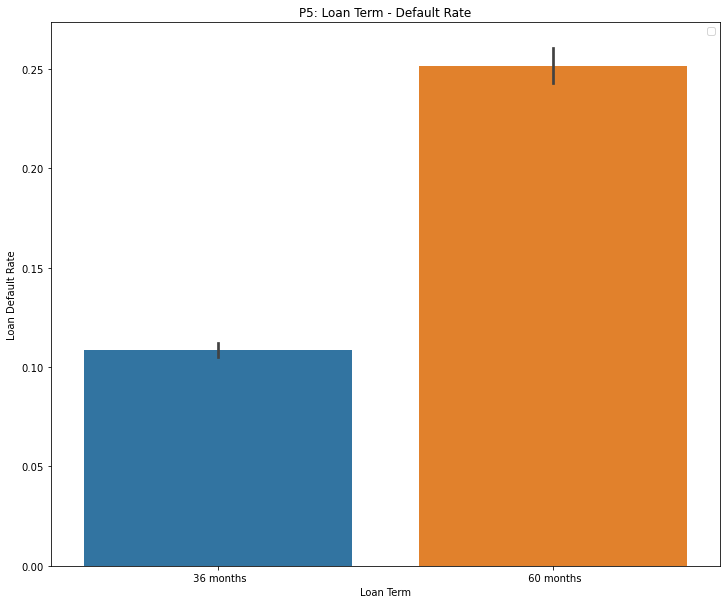

         term  loan_status
0   36 months     0.108636
1   60 months     0.251269


In [40]:
# plotting default loan against Loan term
results = df.groupby('term').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('term',results.term,'Loan Term','P5: Loan Term - Default Rate',{},0)

**Observation:**
- 60 month loan term is more likely to default 

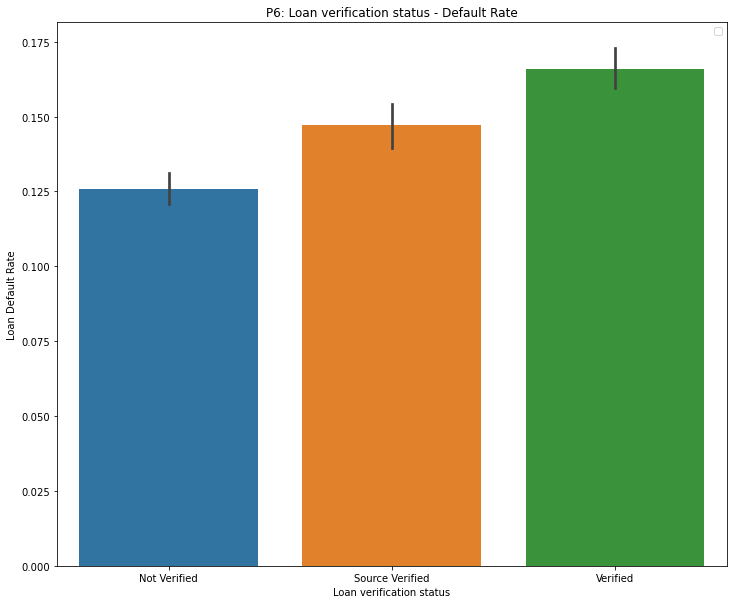

  verification_status  loan_status
0        Not Verified     0.125875
1     Source Verified     0.147040
2            Verified     0.165987


In [41]:
# plotting default loan against Verification Status
results = df.groupby('verification_status').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('verification_status',results.verification_status,'Loan verification status','P6: Loan verification status - Default Rate',{},0)

**Observation:**
- Verfied loans are slightly more likely to deafult.

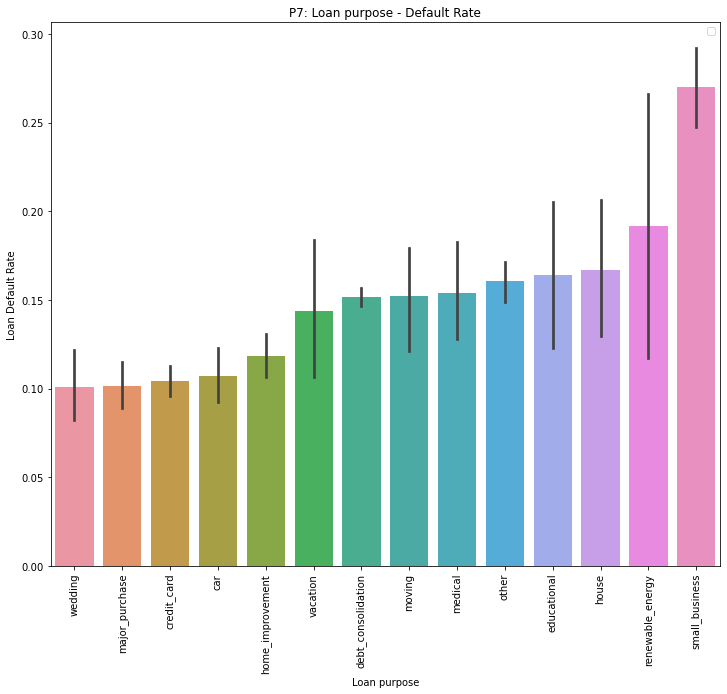

               purpose  loan_status
13             wedding     0.100767
6       major_purchase     0.101442
1          credit_card     0.104103
0                  car     0.107044
4     home_improvement     0.118492
12            vacation     0.143678
2   debt_consolidation     0.151570
8               moving     0.152174
7              medical     0.153963
9                other     0.160517
3          educational     0.164038
5                house     0.166667
10    renewable_energy     0.191489
11      small_business     0.270175


In [42]:
# plotting default loan against Loan Purpose
results = df.groupby('purpose').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('purpose',results.purpose,'Loan purpose','P7: Loan purpose - Default Rate',{},90)

In [43]:
results.sort_values('loan_status',ascending=False)

,purpose,loan_status
11,small_business,0.270175
10,renewable_energy,0.191489
5,house,0.166667
3,educational,0.164038
9,other,0.160517
7,medical,0.153963
8,moving,0.152174
2,debt_consolidation,0.151570
12,vacation,0.143678
4,home_improvement,0.118492


In [44]:
df.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

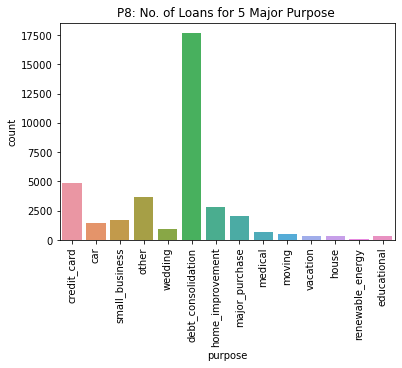

In [45]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.title('P8: No. of Loans for 5 Major Purpose ')
plt.xticks(rotation=90)
plt.show()

In [46]:
# filtering the df for the 4 types of loans mentioned above
purpose_top5 = df['purpose'].value_counts().head(5).index

**Observation:**
- Loan taken for Small business is more likely to default 


In [47]:
# Creating Date derived variable
# then we will observe the distribution of loans across years
# converting the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [48]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [49]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [50]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

We can see that the number of loans has increased steadily across years. 

In [51]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

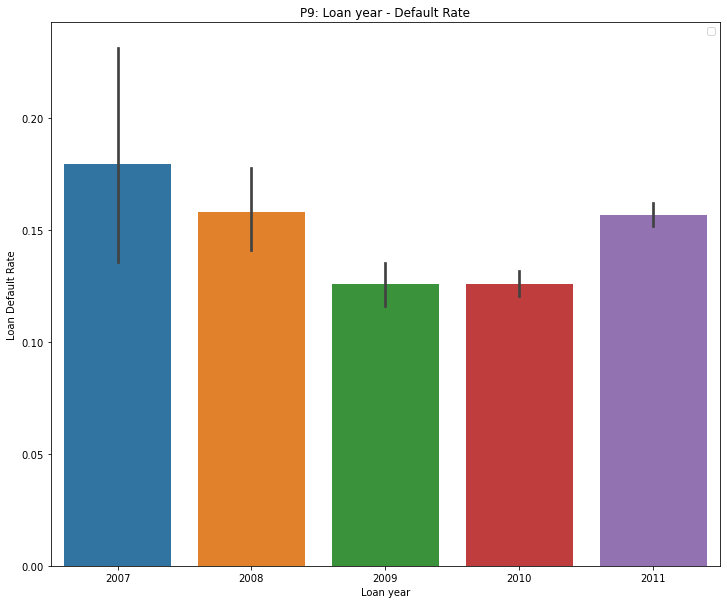

   year  loan_status
0  2007     0.179283
1  2008     0.158131
2  2009     0.125954
3  2010     0.125825
4  2011     0.156659


In [52]:
# lets compare the default rates across years
results = df.groupby('year').loan_status.aggregate(np.mean).reset_index().sort_values('year', ascending=True)
plot_cat('year',results.year,'Loan year','P9: Loan year - Default Rate',{},0)

In [53]:
df.year.value_counts()

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

In [54]:
df.month.value_counts()

12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: month, dtype: int64

**Observation:**
- The default rate was higher in 2007 and it was reducing from 2008 till 2010. However, The default rate had suddenly increased in 2011.


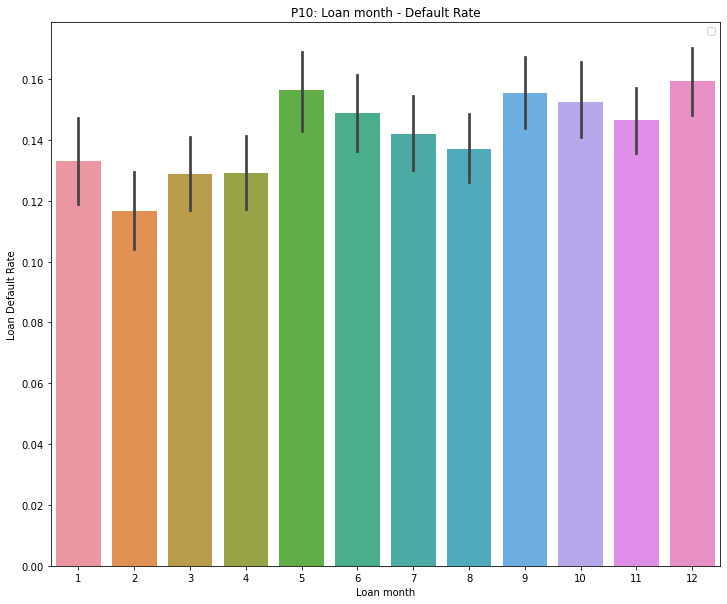

    month  loan_status
0       1     0.132990
1       2     0.116769
2       3     0.128799
3       4     0.129173
4       5     0.156448
5       6     0.148675
6       7     0.142023
7       8     0.137007
8       9     0.155274
9      10     0.152323
10     11     0.146530
11     12     0.159223


In [55]:
# comparing default rates across months
results = df.groupby('month').loan_status.aggregate(np.mean).reset_index().sort_values('month', ascending=True)
plot_cat('month',results.month,'Loan month','P10: Loan month - Default Rate',{},0)

**Observation:**
- The default rate is not showing much variation across months though its observed that month of december is having higher default rate which may be caused due to vacation time and x-max


### Now analyse how the default rate varies across continuous variables.

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

so going to bin the loan amount variable into small, medium, high, very high.

In [56]:
# Creating Derived categorical variable
# binning loan amount
df['loan_amnt'] = pd.cut(df['loan_amnt'],[0,5000,15000,25000,30000],labels=['Low','Medium','High','Very high'])

In [57]:
df['loan_amnt'].value_counts()

Medium       20003
Low           9054
High          7075
Very high      692
Name: loan_amnt, dtype: int64

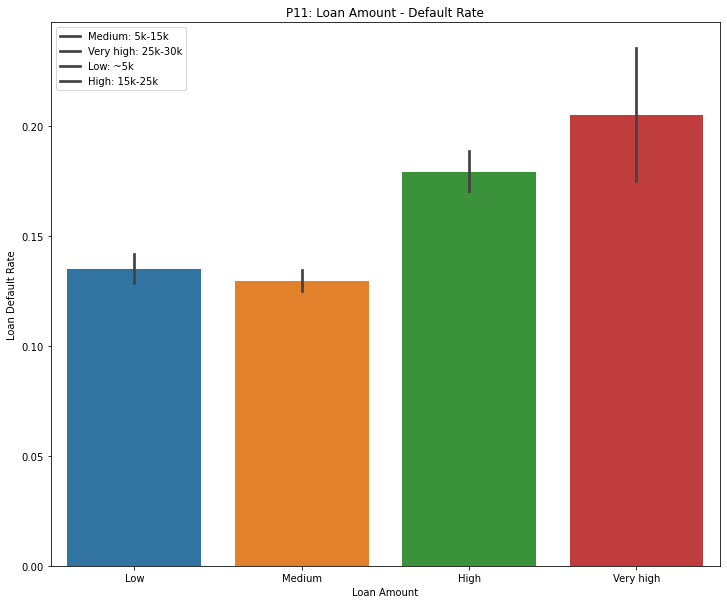

   loan_amnt  loan_status
0        Low     0.134858
1     Medium     0.129631
2       High     0.179364
3  Very high     0.205202


In [58]:
# let's compare the default rates across loan amount type
results = df.groupby('loan_amnt').loan_status.aggregate(np.mean).reset_index().sort_values('loan_amnt', ascending=True)
plot_cat('loan_amnt',results.loan_amnt,'Loan Amount','P11: Loan Amount - Default Rate',{'Low: ~5k','Medium: 5k-15k','High: 15k-25k','Very high: 25k-30k'},0)

**Observation:**
- Higher the loan amount, higher the default rate


In [59]:
# Creating Derived variable
# lets also convert interest rate to low, medium, high
# binning loan amount
df['int_rate']=pd.cut(df['int_rate'],[0,10,15,20],labels=['Low','Medium','High'])

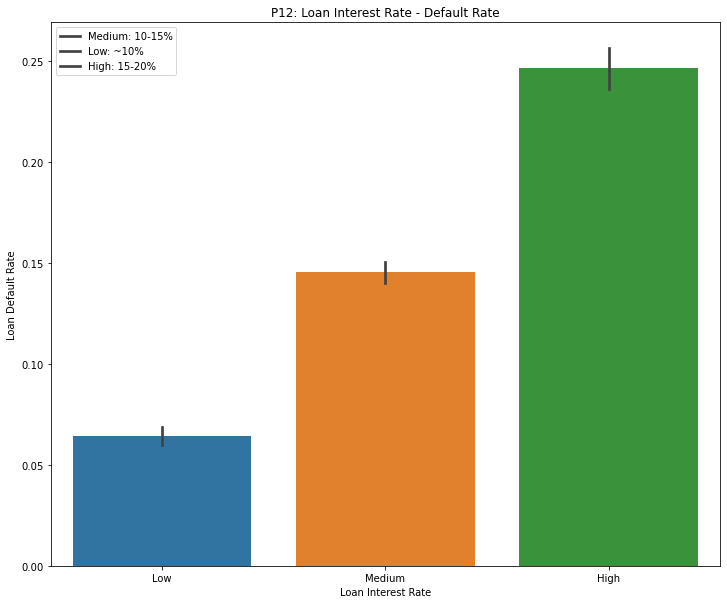

  int_rate  loan_status
0      Low     0.064475
1   Medium     0.145470
2     High     0.246676


In [60]:
# comparing default rates across rates of interest
results = df.groupby('int_rate').loan_status.aggregate(np.mean).reset_index().sort_values('int_rate', ascending=True)
plot_cat('int_rate',results.int_rate,'Loan Interest Rate','P12: Loan Interest Rate - Default Rate',{'Low: ~10%','Medium: 10-15%','High: 15-20%'},0)

**Observation:**
- High interest rates default more, as expected


In [61]:
df['installment']=pd.cut(df['installment'], [0,200,400,600,800], labels=["Low","Medium","High","Very high"])

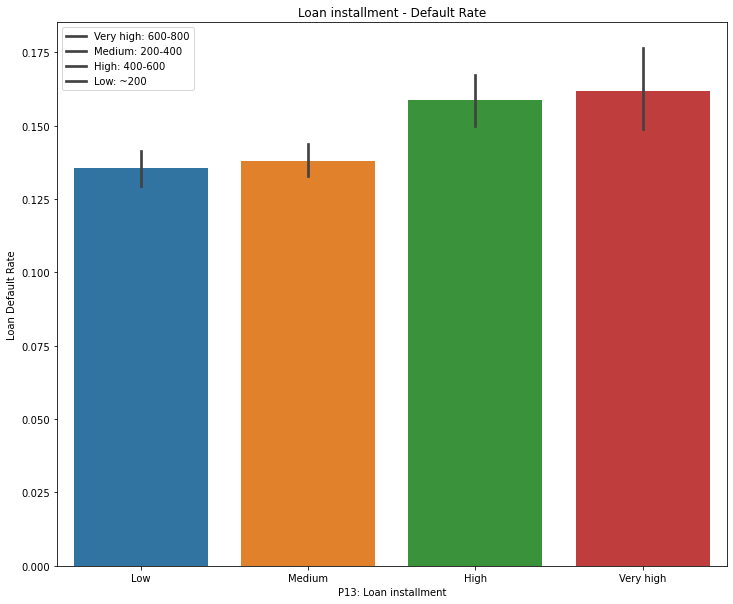

  installment  loan_status
0         Low     0.135523
1      Medium     0.138013
2        High     0.158718
3   Very high     0.161861


In [62]:
# comparing default rates across installment
results = df.groupby('installment').loan_status.aggregate(np.mean).reset_index().sort_values('installment', ascending=True)
plot_cat('installment',results.installment,'P13: Loan installment','Loan installment - Default Rate',{'Low: ~200','Medium: 200-400','High: 400-600','Very high: 600-800'},0)

**Observation:**
- The higher the installment amount, the higher the default rate


#### 4.2.2 Applicant variable analysis

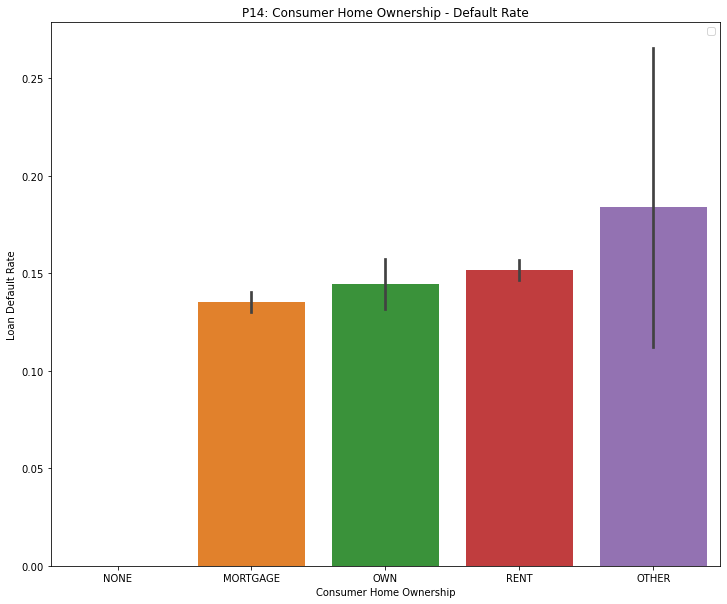

  home_ownership  loan_status
1           NONE     0.000000
0       MORTGAGE     0.135282
3            OWN     0.144404
4           RENT     0.151344
2          OTHER     0.183673


In [63]:
# plotting default loan against Home ownership
results = df.groupby('home_ownership').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_cat('home_ownership',results.home_ownership,'Consumer Home Ownership','P14: Consumer Home Ownership - Default Rate',{},0)

**Observation:**
- doesn't seems to haver an impact as bar height is almost similar for Rent and Own category

In [64]:
# Creating Derived categorical variable for debt to income ratio
df['dti']=pd.cut(df['dti'],[0,10,15,20],labels=['Low','Medium','High'])

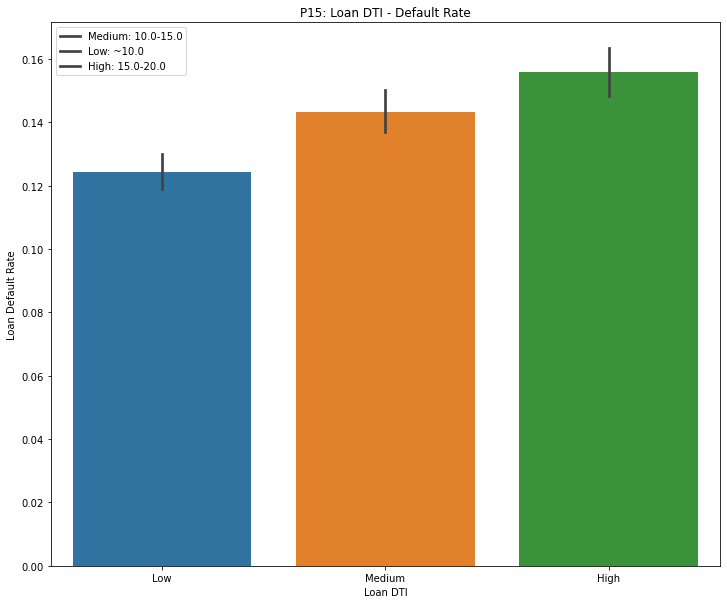

      dti  loan_status
0     Low     0.124424
1  Medium     0.143283
2    High     0.155796


In [65]:
# comparing default rates across debt to income ratio
results = df.groupby('dti').loan_status.aggregate(np.mean).reset_index().sort_values('dti', ascending=True)
plot_cat('dti',results.dti,'Loan DTI','P15: Loan DTI - Default Rate',{'Low: ~10.0','Medium: 10.0-15.0','High: 15.0-20.0'},0)

**Observation:**|
- High dti translates into higher default rates, as expected


In [66]:
df['annual_inc']=pd.cut(df['annual_inc'], [0,50000,100000,150000,200000], labels=["Low","Medium","High","Very high"])

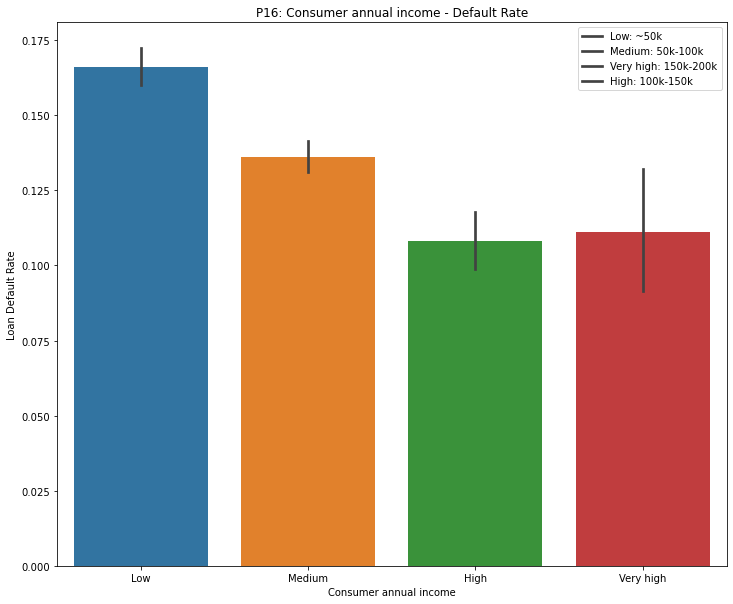

  annual_inc  loan_status
0        Low     0.166099
1     Medium     0.136064
2       High     0.108251
3  Very high     0.111233


In [67]:
# annual income and default rate
results = df.groupby('annual_inc').loan_status.aggregate(np.mean).reset_index().sort_values('annual_inc', ascending=True)
plot_cat('annual_inc',results.annual_inc,'Consumer annual income','P16: Consumer annual income - Default Rate',{'Low: ~50k','Medium: 50k-100k','High: 100k-150k','Very high: 150k-200k'},0)

**Observation:**
- Lower the annual income, higher the default rate


In [68]:
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]
df['emp_length']=pd.cut(df['emp_length'], [0,1,3,7,10], labels=["Fresher","Junior","Mid-Range","Senior"])

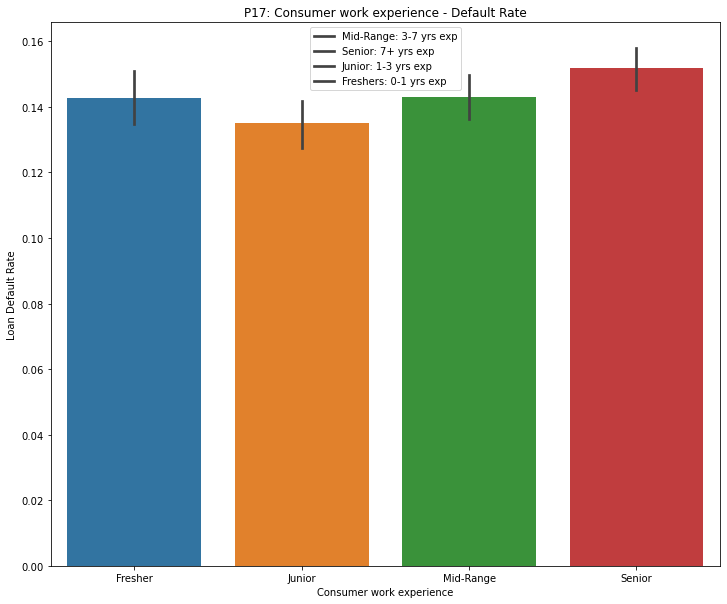

  emp_length  loan_status
0    Fresher     0.142634
1     Junior     0.135132
2  Mid-Range     0.143063
3     Senior     0.151762


In [69]:
# emp_length and default rate
results = df.groupby('emp_length').loan_status.aggregate(np.mean).reset_index().sort_values('emp_length', ascending=True)
plot_cat('emp_length',results.emp_length,'Consumer work experience','P17: Consumer work experience - Default Rate',{'Freshers: 0-1 yrs exp','Junior: 1-3 yrs exp','Mid-Range: 3-7 yrs exp','Senior: 7+ yrs exp'},0)

**Observation:**
- Not much difference but 10+ years of exp. people are more likely to dafault.


### 4.3 Bi-variate Analysis and Segmented Analysis to identify factors

By now we have compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

Now, have a look at the default rates across the purpose of the loan.

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

so, first look at the number of loans for each type (purpose) of the loan most loans are debt consolidation (to repay other debts), then credit card, major purchase etc.

Now, analyse the top 5 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.


In [70]:
df = df[df['purpose'].isin(purpose_top5)]

In [71]:
# function which takes a categorical variable and plots the default rate
def plot_segmented(cat_var, sOrder, xLabel, sTitle, sRot):
    plt.figure(figsize=(12,10))
    plt.title(sTitle)
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df,order=sOrder)
    plt.ylabel('Loan Default Rate')
    plt.xlabel(xLabel)
    plt.xticks(rotation=sRot)
    plt.show()
    print(results)

#### 4.3.1 Loan characteristics analysis

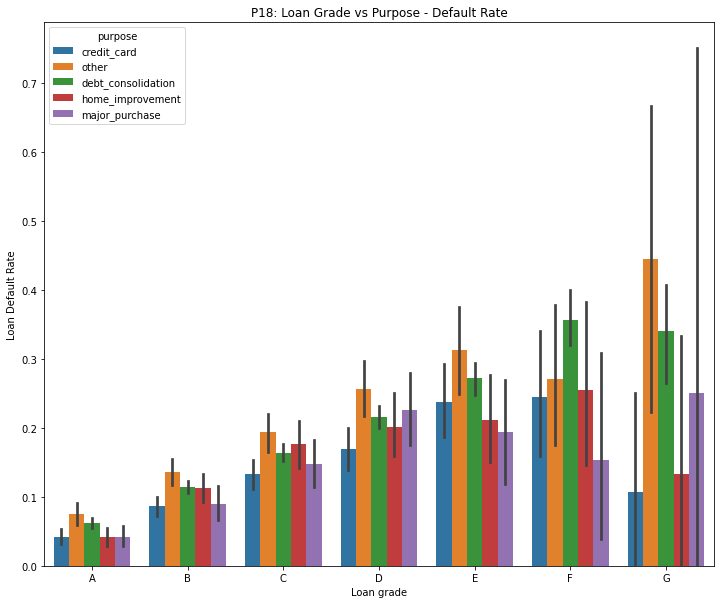

  grade  loan_status
0     A     0.055534
1     B     0.110654
2     C     0.162733
3     D     0.212939
4     E     0.263326
5     F     0.321205
6     G     0.303965


In [72]:
# comparing grade of loan 
results = df.groupby('grade').loan_status.aggregate(np.mean).reset_index().sort_values('grade', ascending=True)
plot_segmented('grade',results.grade,'Loan grade','P18: Loan Grade vs Purpose - Default Rate',0)

**Observation:**
- The default rate of the Loan increases significantly for category 'Other' as grade decreases from A to G


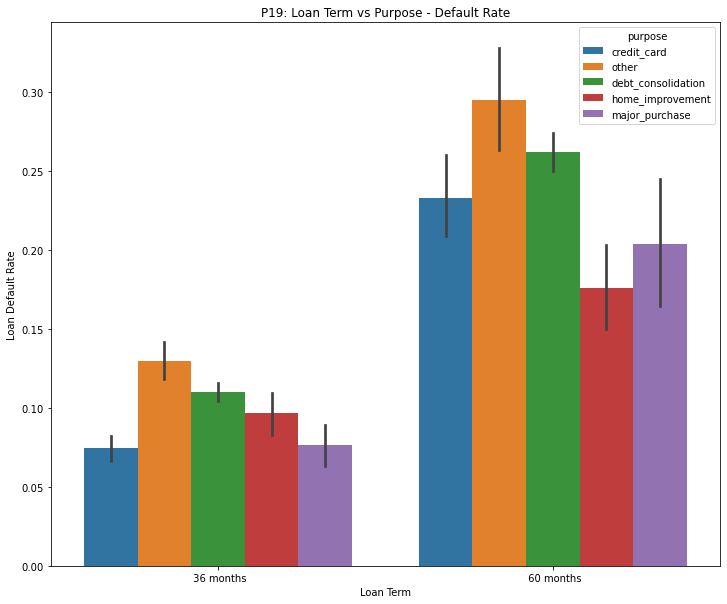

         term  loan_status
0   36 months     0.102959
1   60 months     0.249607


In [73]:
results = df.groupby('term').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_segmented('term',results.term,'Loan Term','P19: Loan Term vs Purpose - Default Rate',0)

**Observation:**
- The default rate of the Loan increases significantly for ALL4 pupose for loan term 60 months


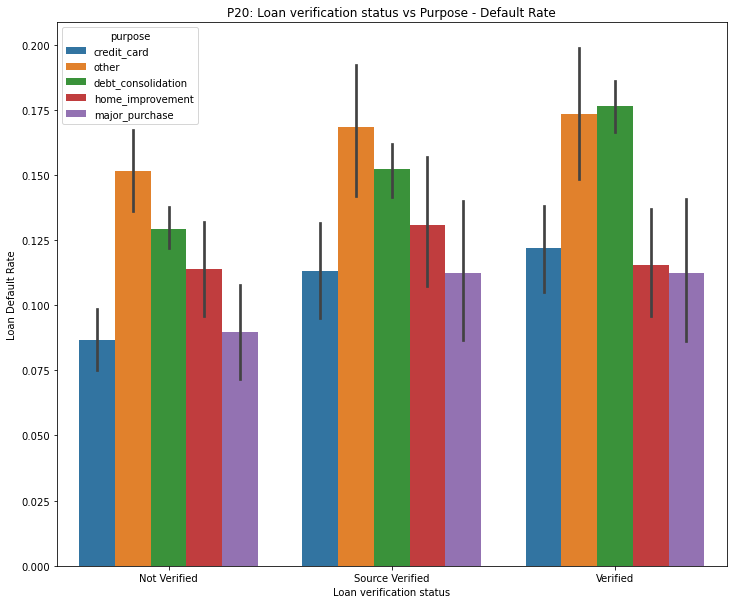

  verification_status  loan_status
0        Not Verified     0.121266
1     Source Verified     0.143192
2            Verified     0.159095


In [74]:
results = df.groupby('verification_status').loan_status.aggregate(np.mean).reset_index().sort_values('verification_status', ascending=True)
plot_segmented('verification_status',results.verification_status,'Loan verification status','P20: Loan verification status vs Purpose - Default Rate',0)

**Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

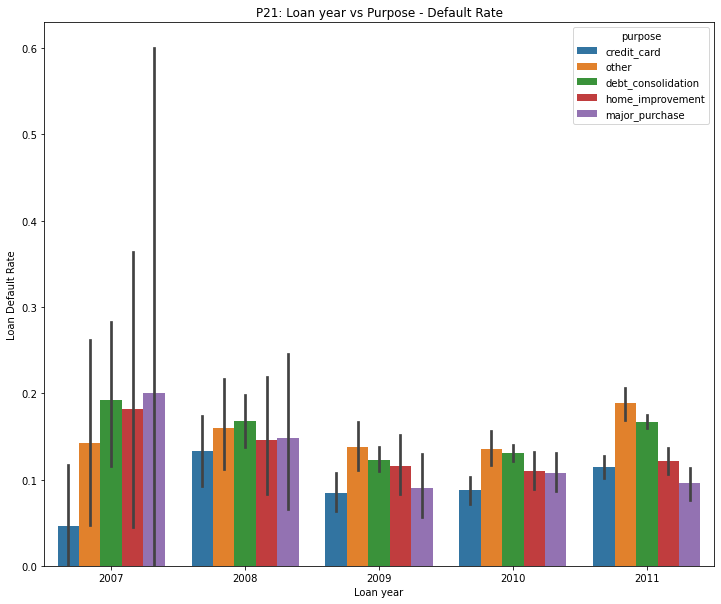

   year  loan_status
0  2007     0.147368
1  2008     0.156398
2  2009     0.116631
3  2010     0.121324
4  2011     0.152437


In [75]:
results = df.groupby('year').loan_status.aggregate(np.mean).reset_index().sort_values('year', ascending=True)
plot_segmented('year',results.year,'Loan year','P21: Loan year vs Purpose - Default Rate',0)

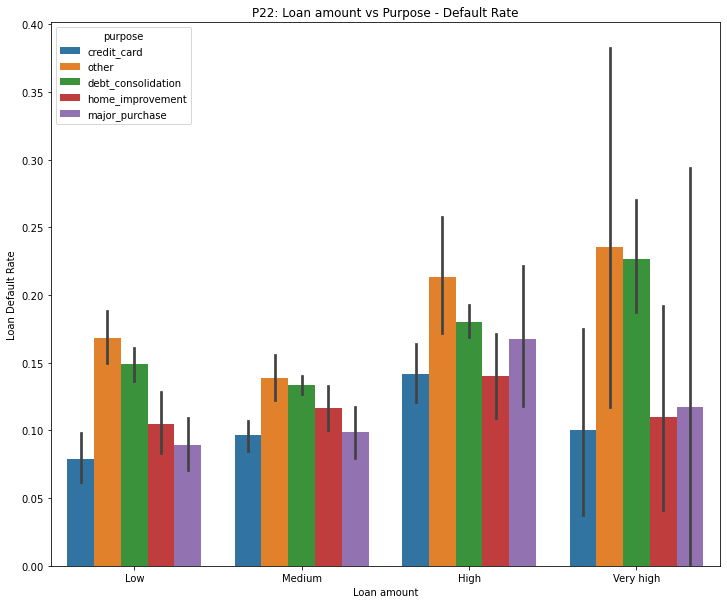

   loan_amnt  loan_status
0        Low     0.132569
1     Medium     0.124016
2       High     0.172397
3  Very high     0.193496


In [76]:
results = df.groupby('loan_amnt').loan_status.aggregate(np.mean).reset_index().sort_values('loan_amnt', ascending=True)
plot_segmented('loan_amnt',results.loan_amnt,'Loan amount','P22: Loan amount vs Purpose - Default Rate',0)

**Observation:**
- As the loan amount incrases, default rate increases.Moreover, deafult rate for loan taken for credit card purpose increases significantly with loan amount.

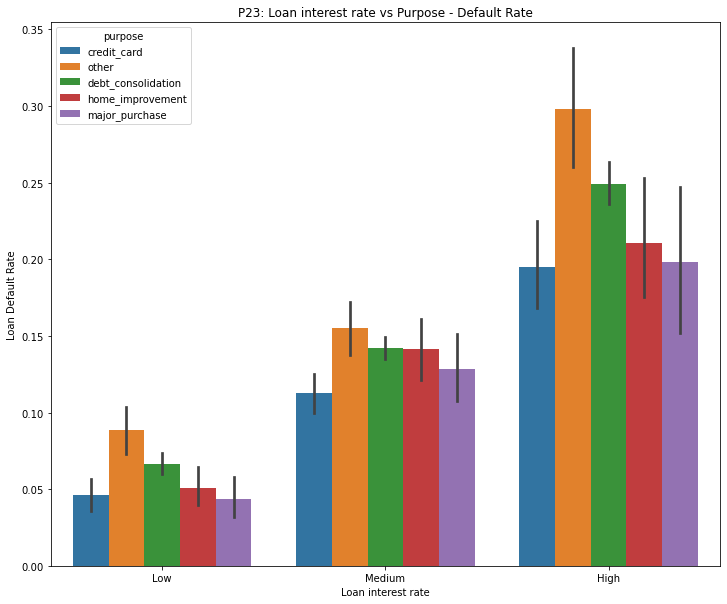

  int_rate  loan_status
0      Low     0.061778
1   Medium     0.138168
2     High     0.242224


In [77]:
results = df.groupby('int_rate').loan_status.aggregate(np.mean).reset_index().sort_values('int_rate', ascending=True)
plot_segmented('int_rate',results.int_rate,'Loan interest rate','P23: Loan interest rate vs Purpose - Default Rate',0)

**Observation:**
- As the intrest rate incrases, default rate increases.plus, deafult rate for loan taken for debt consolidation increases significantly with higher intrest rate.

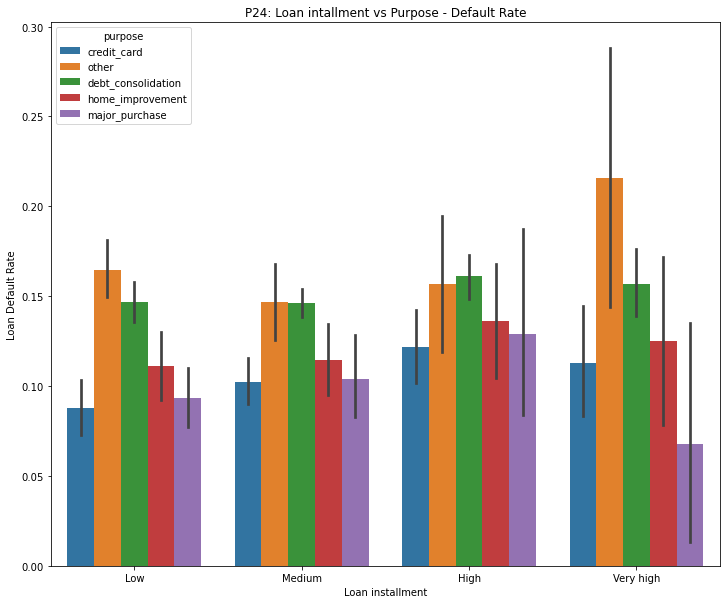

  installment  loan_status
0         Low     0.132718
1      Medium     0.133671
2        High     0.151589
3   Very high     0.147428


In [78]:
results = df.groupby('installment').loan_status.aggregate(np.mean).reset_index().sort_values('installment', ascending=True)
plot_segmented('installment',results.installment,'Loan installment','P24: Loan intallment vs Purpose - Default Rate',0)

**Observation:**
- default rate for loan taken for debt consolidation is higher in all type of installment amount.

#### 4.3.2 Applicant variable analysis

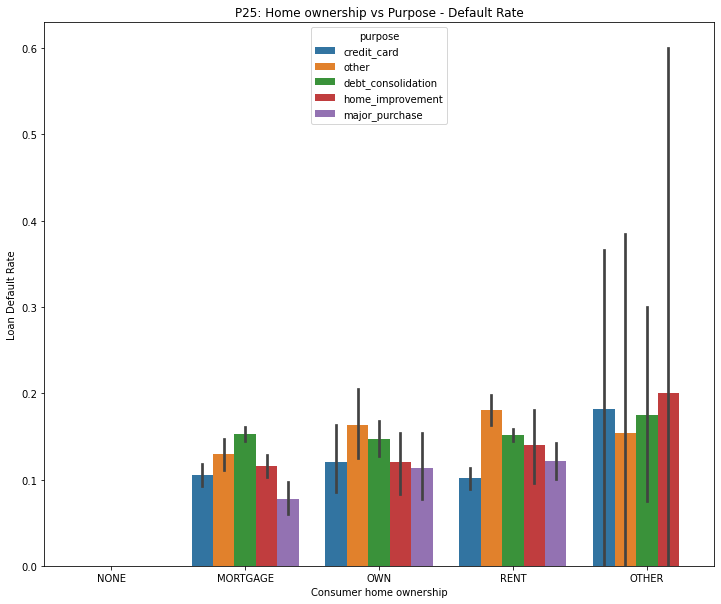

  home_ownership  loan_status
1           NONE     0.000000
0       MORTGAGE     0.132287
3            OWN     0.139475
4           RENT     0.144903
2          OTHER     0.157895


In [79]:
# comparing home ownership with respect to loan status
results = df.groupby('home_ownership').loan_status.aggregate(np.mean).reset_index().sort_values('loan_status', ascending=True)
plot_segmented('home_ownership',results.home_ownership,'Consumer home ownership','P25: Home ownership vs Purpose - Default Rate',0)

**Observation:**
- In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.


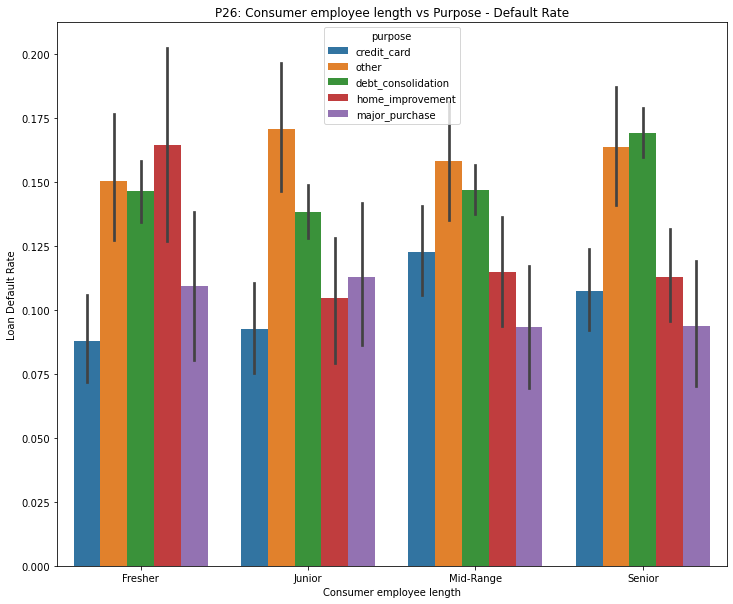

  emp_length  loan_status
0    Fresher     0.135179
1     Junior     0.130505
2  Mid-Range     0.137867
3     Senior     0.148156


In [80]:
# comparing emp_length w.r.t loan status
results = df.groupby('emp_length').loan_status.aggregate(np.mean).reset_index().sort_values('emp_length', ascending=True)
plot_segmented('emp_length',results.emp_length,'Consumer employee length','P26: Consumer employee length vs Purpose - Default Rate',0)

**Observation:**
- We have seen that employee with 10+ years of exp. default the most. However, loan taken for "home improvement" is defaulted most by employee with 0-1 year of exp.


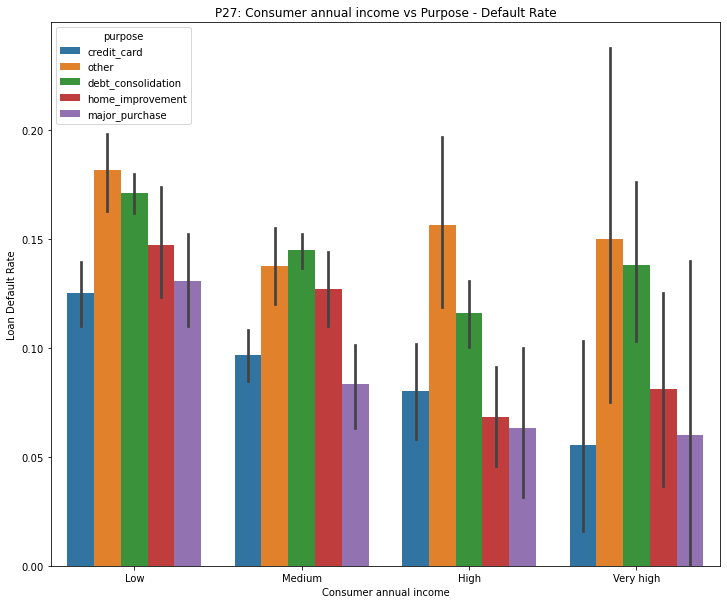

  annual_inc  loan_status
0        Low     0.161328
1     Medium     0.130861
2       High     0.103427
3  Very high     0.110381


In [81]:
# comparing annual income w.r.t loan status
results = df.groupby('annual_inc').loan_status.aggregate(np.mean).reset_index().sort_values('annual_inc', ascending=True)
plot_segmented('annual_inc',results.annual_inc,'Consumer annual income','P27: Consumer annual income vs Purpose - Default Rate',0)

#### 4.3.3 Correlation matrix

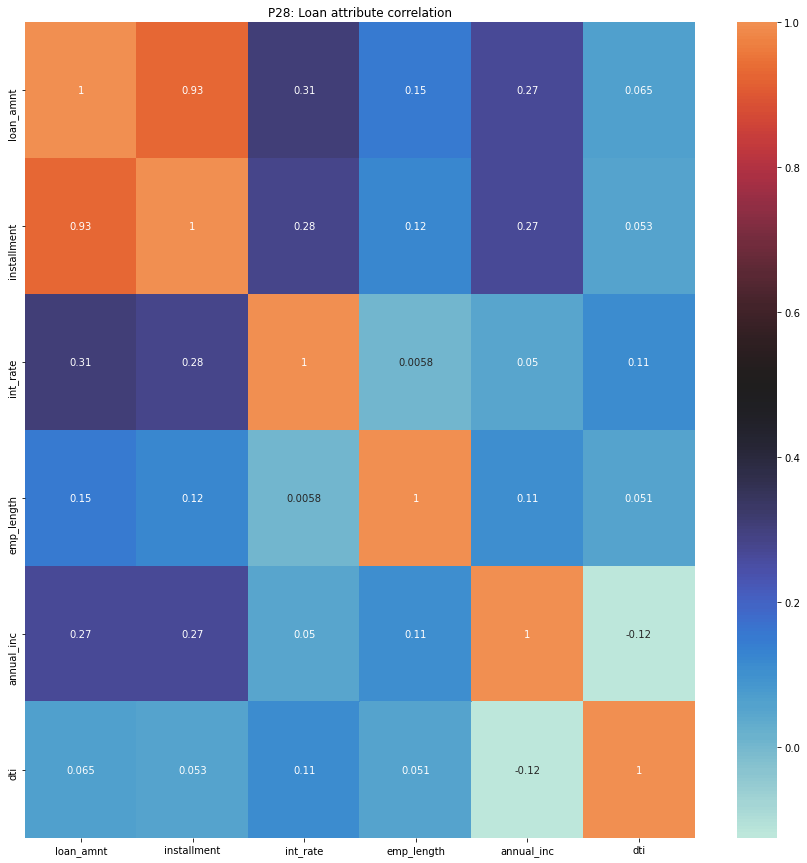

In [82]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt','term','installment','int_rate','emp_length', 'annual_inc','dti',]
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.title('P28: Loan attribute correlation')
plt.show()

**Observation:**

- loan_amnt is highely correlated to installment with factor 0.93, as expected
- int_rate is correlated with loan_amount with factor 0.31
- annual_inc is correlated with loan_amnt with factor 0.27
- dti is negatively correlated to annual_inc with factor -0.12

# Recommendations
1. Stop giving loan for Small business,as its more likely to default.
2. High interest rates default more. so it is advisable to give few loan at High interest to minimize the loss.
3. The higher the installment amount, the higher the default rate, so 
4. Default rate is high for 60 months loan term, so it is good to not give many loans for long term. 
5. Debt consolidation loans have the highest default rates.

For more Recommendations, please refer the PDF file.

# End of file